In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [2]:
from dotenv import load_dotenv, find_dotenv
import os
import sys

load_dotenv()
sys.path.append(os.path.dirname(find_dotenv()))

In [3]:
from src.data.preprocess_dataset import text_semantic_preprocess

In [4]:
test_df = pd.read_csv("../data/interim/dataset/test.csv", index_col=0)
lemmatized_df = pd.DataFrame(
    test_df.apply(lambda x: text_semantic_preprocess(x["source"]), axis=1)
)
lemmatized_df.head()

,0
0,"[think, grandpa, gon, na, protect, u, big, bad..."
1,"[might, add, clever, asshole]"
2,"[hate, dickhead]"
3,"[jason, put, stupid, camera, come, help]"
4,[scumbag]


In [5]:
baseline_preds = pd.read_csv(
    "../data/interim/predictions/baseline-detoxify.csv", index_col=0
)
sota_preds = pd.read_csv("../data/interim/predictions/sota-detoxify.csv", index_col=0)
t5_preds = pd.read_csv("../data/interim/predictions/t5-ft-detoxify.csv", index_col=0)
t52_preds = pd.read_csv("../data/interim/predictions/t5-ft2-detoxify.csv", index_col=0)

In [6]:
lemmatized_baseline = pd.DataFrame(
    baseline_preds.apply(lambda x: text_semantic_preprocess(x["target"]), axis=1)
)
lemmatized_sota = pd.DataFrame(
    sota_preds.apply(lambda x: text_semantic_preprocess(x["target"]), axis=1)
)
lemmatized_t5 = pd.DataFrame(
    t5_preds.apply(lambda x: text_semantic_preprocess(x["target"]), axis=1)
)

In [7]:
lemmatized_t5.head()

,0
0,"[think, grandpa, gon, na, protect, u, eric, no..."
1,"[sure, add, clever, slack]"
2,"[hate, dickhead]"
3,"[jason, put, camera, come, help]"
4,[scumbag]


In [8]:
lemmatized_df.columns

RangeIndex(start=0, stop=1, step=1)

In [9]:
bad_text = " ".join([token for tokens in lemmatized_df[0] for token in tokens])
bad_text[:100]

'think grandpa gon na protect u big bad fucking eric northman might add clever asshole hate dickhead '

In [10]:
baseline_text = " ".join(
    [token for tokens in lemmatized_baseline[0] for token in tokens]
)
sota_text = " ".join([token for tokens in lemmatized_sota[0] for token in tokens])
t5_text = " ".join([token for tokens in lemmatized_t5[0] for token in tokens])

In [11]:
bad_wordcloud = WordCloud(
    max_font_size=40, background_color="white", margin=0, width=300, height=300
).generate(bad_text)

In [12]:
baseline_wordcloud = WordCloud(
    max_font_size=40, background_color="white", margin=0, width=300, height=300
).generate(baseline_text)
sota_wordcloud = WordCloud(
    max_font_size=40, background_color="white", margin=0, width=300, height=300
).generate(sota_text)
t5_wordcloud = WordCloud(
    max_font_size=40, background_color="white", margin=0, width=300, height=300
).generate(t5_text)

In [13]:
clouds = [
    ("Source data", bad_wordcloud),
    ("Baseline predictions", baseline_wordcloud),
    ("SOTA predictions", sota_wordcloud),
    ("T5 predictions", t5_wordcloud),
]

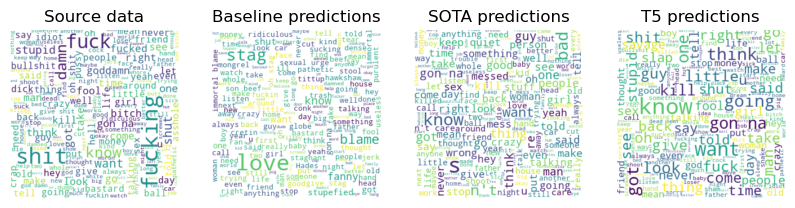

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(10, 10))
axs = np.array(axs).flatten()

for ax, [title, cloud] in zip(axs, clouds):
    ax.imshow(cloud, interpolation="bilinear")
    ax.set_title(title)
    ax.axis("off")

plt.savefig("../reports/figures/final/wordcloud.png", bbox_inches="tight")

In [15]:
baseline_metrics = pd.read_csv(
    "../data/interim/metrics/baseline-metrics.csv", index_col=0
)
sota_metrics = pd.read_csv("../data/interim/metrics/sota-metrics.csv", index_col=0)
t5_metrics = pd.read_csv("../data/interim/metrics/t5-ft-metrics.csv", index_col=0)
t52_metrics = pd.read_csv("../data/interim/metrics/t5-ft2-metrics.csv", index_col=0)

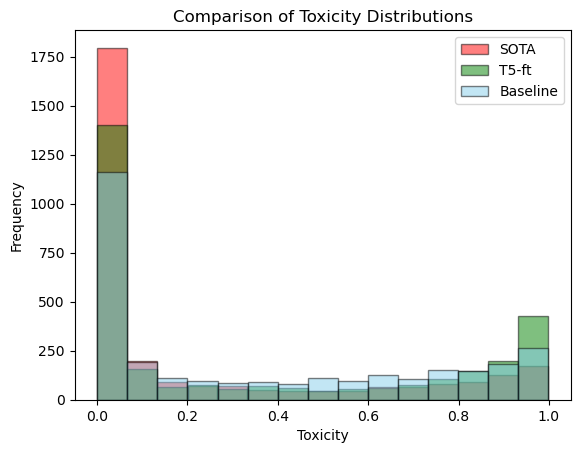

In [16]:
# Assuming you have three DataFrames: df1, df2, df3
toxicity_values1 = baseline_metrics["toxicity"]
toxicity_values2 = sota_metrics["toxicity"]
toxicity_values3 = t5_metrics["toxicity"]

plt.hist(
    toxicity_values2, bins=15, color="red", edgecolor="black", alpha=0.5, label="SOTA"
)
plt.hist(
    toxicity_values3,
    bins=15,
    color="green",
    edgecolor="black",
    alpha=0.5,
    label="T5-ft",
)
plt.hist(
    toxicity_values1,
    bins=15,
    color="skyblue",
    edgecolor="black",
    alpha=0.5,
    label="Baseline",
)

plt.xlabel("Toxicity")
plt.ylabel("Frequency")
plt.title("Comparison of Toxicity Distributions")

plt.legend()
plt.savefig("../reports/figures/final/toxicity.png", bbox_inches="tight")

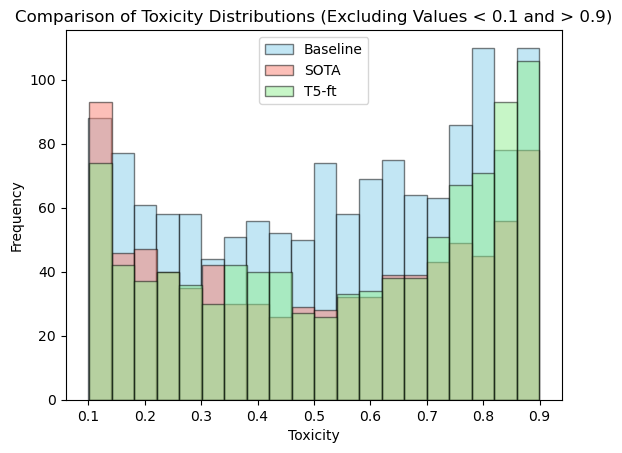

In [17]:
import matplotlib.pyplot as plt

# Assuming you have three DataFrames: df1, df2, df3
toxicity_values1 = baseline_metrics["toxicity"]
toxicity_values2 = sota_metrics["toxicity"]
toxicity_values3 = t5_metrics["toxicity"]

# Filter values within the desired range (0.1 to 0.9)
filtered_toxicity_values1 = [x for x in toxicity_values1 if 0.1 <= x <= 0.9]
filtered_toxicity_values2 = [x for x in toxicity_values2 if 0.1 <= x <= 0.9]
filtered_toxicity_values3 = [x for x in toxicity_values3 if 0.1 <= x <= 0.9]

# Create histograms for each dataset with different colors
plt.hist(
    filtered_toxicity_values1,
    bins=20,
    color="skyblue",
    edgecolor="black",
    alpha=0.5,
    label="Baseline",
)
plt.hist(
    filtered_toxicity_values2,
    bins=20,
    color="salmon",
    edgecolor="black",
    alpha=0.5,
    label="SOTA",
)
plt.hist(
    filtered_toxicity_values3,
    bins=20,
    color="lightgreen",
    edgecolor="black",
    alpha=0.5,
    label="T5-ft",
)

# Set labels and title
plt.xlabel("Toxicity")
plt.ylabel("Frequency")
plt.title("Comparison of Toxicity Distributions (Excluding Values < 0.1 and > 0.9)")

# Add a legend to distinguish the datasets
plt.legend()

# Show the plot
plt.savefig("../reports/figures/final/toxicity-limited.png", bbox_inches="tight")

In [18]:
bleu_df = pd.DataFrame(
    {
        "Baseline": baseline_metrics["bleu"],
        "SOTA": sota_metrics["bleu"],
        "T5-ft": t5_metrics["bleu"],
    }
)
meteor_df = pd.DataFrame(
    {
        "Baseline": baseline_metrics["meteor"],
        "SOTA": sota_metrics["meteor"],
        "T5-ft": t5_metrics["meteor"],
    }
)
semantic_df = pd.DataFrame(
    {
        "Baseline": baseline_metrics["semantic"],
        "SOTA": sota_metrics["semantic"],
        "T5-ft": t5_metrics["semantic"],
    }
)

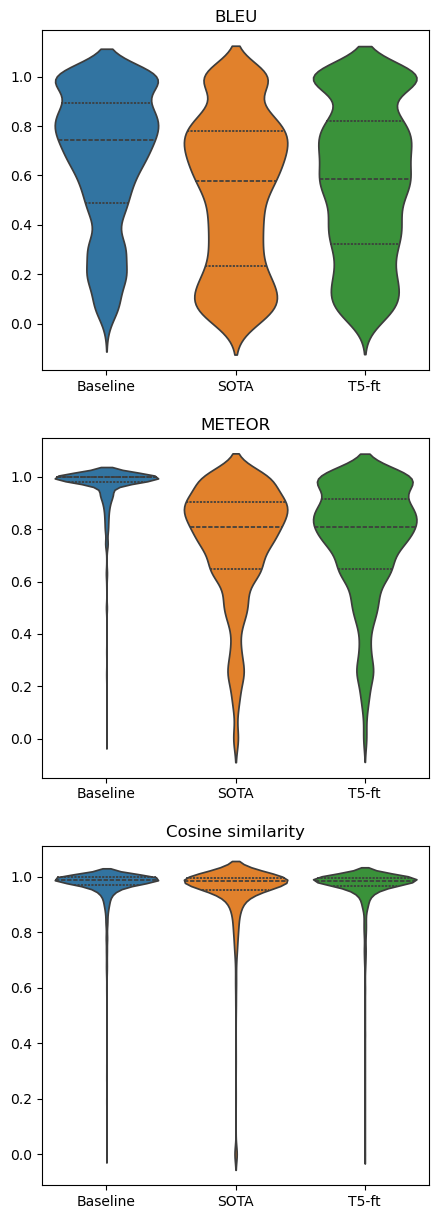

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(5, 15))
ax = np.array(ax).flatten()

sns.violinplot(data=bleu_df, ax=ax[0], inner="quart")
sns.violinplot(data=meteor_df, ax=ax[1], inner="quart")
sns.violinplot(data=semantic_df, ax=ax[2], inner="quart")

ax[0].set_title("BLEU")
ax[1].set_title("METEOR")
ax[2].set_title("Cosine similarity")

plt.savefig("../reports/figures/final/semantic.png", bbox_inches="tight")

# T5-ft vs T5-ft2


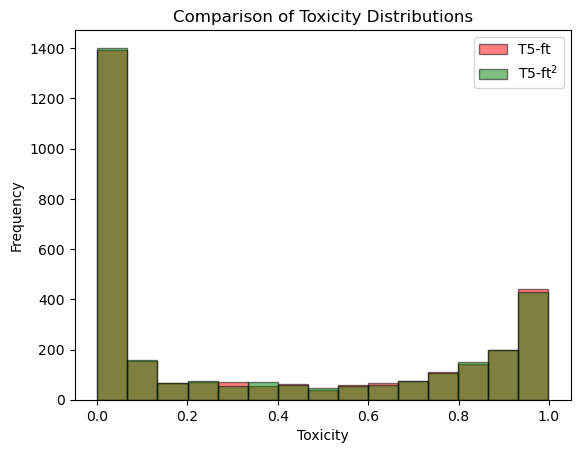

In [23]:
# Assuming you have three DataFrames: df1, df2, df3
toxicity_values1 = t5_metrics["toxicity"]
toxicity_values2 = t52_metrics["toxicity"]

plt.hist(
    toxicity_values2, bins=15, color="red", edgecolor="black", alpha=0.5, label="T5-ft"
)
plt.hist(
    toxicity_values3,
    bins=15,
    color="green",
    edgecolor="black",
    alpha=0.5,
    label="T5-ft$^2$",
)

plt.xlabel("Toxicity")
plt.ylabel("Frequency")
plt.title("Comparison of Toxicity Distributions")

plt.legend()
plt.savefig("../reports/figures/final/t5-52-toxicity.png", bbox_inches="tight")

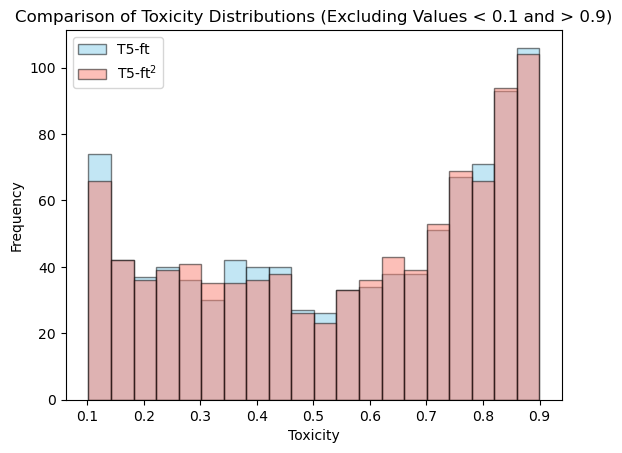

In [25]:
import matplotlib.pyplot as plt

# Assuming you have three DataFrames: df1, df2, df3
toxicity_values1 = t5_metrics["toxicity"]
toxicity_values2 = t52_metrics["toxicity"]

# Filter values within the desired range (0.1 to 0.9)
filtered_toxicity_values1 = [x for x in toxicity_values1 if 0.1 <= x <= 0.9]
filtered_toxicity_values2 = [x for x in toxicity_values2 if 0.1 <= x <= 0.9]

# Create histograms for each dataset with different colors
plt.hist(
    filtered_toxicity_values1,
    bins=20,
    color="skyblue",
    edgecolor="black",
    alpha=0.5,
    label="T5-ft",
)
plt.hist(
    filtered_toxicity_values2,
    bins=20,
    color="salmon",
    edgecolor="black",
    alpha=0.5,
    label="T5-ft$^2$",
)

# Set labels and title
plt.xlabel("Toxicity")
plt.ylabel("Frequency")
plt.title("Comparison of Toxicity Distributions (Excluding Values < 0.1 and > 0.9)")

# Add a legend to distinguish the datasets
plt.legend()

# Show the plot
plt.savefig("../reports/figures/final/t5-52-tox-limited.png", bbox_inches="tight")